In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

In [3]:
cols = ['geometry', 'bikelane', 'crash']
streets = (pd
           .read_csv('./data/mainstreets.csv', usecols=cols)
           .rename(columns={'bikelane': 'exposure', 'crash': 'outcome'})
           .assign(geometry = lambda df: df.geometry.map(wkt.loads))
)

In [4]:
cols=['geometry', 'exposed', 'outcome']
matched = (pd
           .read_csv('./data/matched.csv', usecols=cols)
           .rename(columns={'exposed': 'exposure'})
           .assign(geometry = lambda df: df.geometry.map(wkt.loads))
)

In [5]:
geosiexp = gpd.GeoDataFrame(matched.loc[matched.exposure==1])
geonoexp = gpd.GeoDataFrame(matched.loc[matched.exposure==0])
geostrts = gpd.GeoDataFrame(streets)

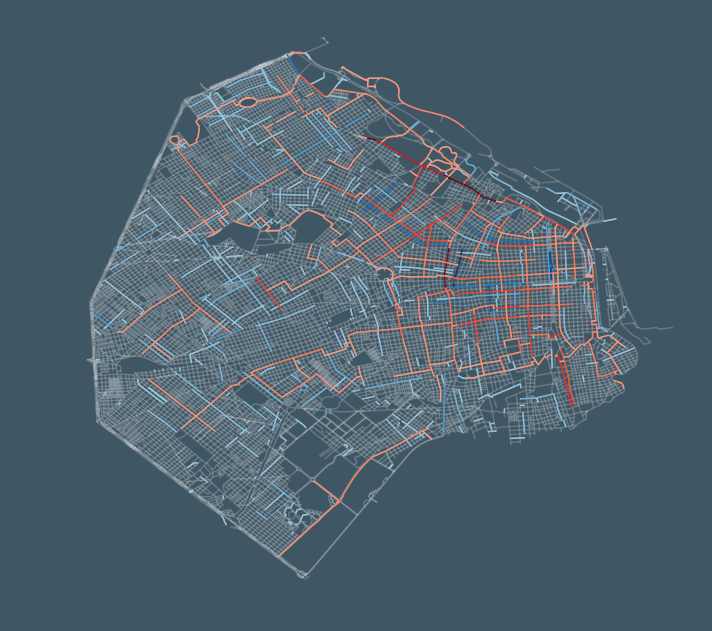

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,10), facecolor='#3f5664')
geostrts.plot(color='white', alpha=0.2, ax=ax)
geonoexp.plot(column='outcome', cmap='Blues', vmin=-20, ax=ax)
geosiexp.plot(column='outcome', cmap='Reds', vmin=-20, ax=ax)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('./assets/figure_main.png', facecolor=fig.get_facecolor())